In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib packages
from scipy import stats
from scipy.stats import skew, norm

# Utils packages
#!pip install pandasql
import pandasql as ps
import re 
import math, string, os
import datetime
from IPython.display import Image

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

In [2]:
# Concat all week csv files
import glob
#import os
#os.chdir("/Users/DRNPRO/Documents/GitHub/APM-Term-Project/nfl-big-data-bowl-2021/tracking")
extension = 'csv'
all_filenames = [i for i in glob.glob('nfl-big-data-bowl-2021/tracking/*.{}'.format(extension))]
weeks = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [3]:
# read in game and plays data
games = pd.read_csv('nfl-big-data-bowl-2021/games.csv')
plays = pd.read_csv('nfl-big-data-bowl-2021/plays.csv')

In [4]:
# Function to count number of games in a week
def num_games(games):
    return games['gameId'].nunique()

# Function to count number of plays in a week
def num_plays(plays):
    return plays['playId'].nunique()

In [5]:
print('Number of games in 2018 season:', num_games(games))
print('Number of plays in 2018 season:', num_plays(plays))

print('\n\nNumber of plays per week:')
print(num_plays(plays.merge(games, on='gameId').groupby('week')))

print('\n\nNumber of games per week')
print(num_games(games.groupby('week')))

print('\n\nNumber of games per team')
print(num_games(games.groupby('homeTeamAbbr')) + num_games(games.groupby('visitorTeamAbbr')))

Number of games in 2018 season: 253
Number of plays in 2018 season: 4592


Number of plays per week:
week
1      928
2     1120
3     1079
4     1120
5     1077
6      990
7      936
8      943
9      896
10     902
11     871
12     962
13    1072
14    1076
15    1041
16    1068
17     981
Name: playId, dtype: int64


Number of games per week
week
1     13
2     16
3     16
4     15
5     15
6     15
7     14
8     14
9     13
10    14
11    13
12    15
13    16
14    16
15    16
16    16
17    16
Name: gameId, dtype: int64


Number of games per team
homeTeamAbbr
ARI    16
ATL    16
BAL    16
BUF    16
CAR    16
CHI    16
CIN    16
CLE    16
DAL    16
DEN    15
DET    16
GB     16
HOU    16
IND    16
JAX    16
KC     15
LA     16
LAC    15
MIA    16
MIN    15
NE     16
NO     16
NYG    16
NYJ    16
OAK    16
PHI    16
PIT    16
SEA    15
SF     15
TB     16
TEN    16
WAS    16
Name: gameId, dtype: int64


In [6]:
# merge tracking data with games
data = weeks.merge(games, on='gameId')

# merge data with plays
data = data.merge(plays[['gameId','playId','possessionTeam']], on=['gameId','playId'])
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,possessionTeam
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,ATL
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,ATL


In [7]:
data.shape

(18309388, 25)

In [8]:
Image(url = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3258%2F820e86013d48faacf33b7a32a15e814c%2FIncreasing%20Dir%20and%20O.png?generation=1572285857588233&alt=media')

In [9]:
# Viewing first dataset rows
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,possessionTeam
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,ATL
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,ATL
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,ATL


In [10]:
# Viewing feature types
data.dtypes

time                object
x                  float64
y                  float64
s                  float64
a                  float64
dis                float64
o                  float64
dir                float64
event               object
nflId              float64
displayName         object
jerseyNumber       float64
position            object
frameId              int64
team                object
gameId               int64
playId               int64
playDirection       object
route               object
gameDate            object
gameTimeEastern     object
homeTeamAbbr        object
visitorTeamAbbr     object
week                 int64
possessionTeam      object
dtype: object

In [11]:
data.shape

(18309388, 25)

In [12]:
# Viewing statistical data of numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,18309388.0,5.983316e+01,24.556531,-9.290000e+00,4.128000e+01,5.978000e+01,7.829000e+01,1.300100e+02
y,18309388.0,2.673458e+01,11.075252,-1.344000e+01,1.911000e+01,2.672000e+01,3.438000e+01,6.874000e+01
s,18309387.0,3.193072e+00,2.856562,0.000000e+00,8.700000e-01,2.810000e+00,4.940000e+00,4.274000e+01
a,18309360.0,1.989004e+00,1.601185,0.000000e+00,7.300000e-01,1.750000e+00,2.940000e+00,7.015000e+01
dis,18309387.0,3.231398e-01,0.306961,0.000000e+00,9.000000e-02,2.800000e-01,4.900000e-01,1.269000e+01
o,17061528.0,1.807472e+02,100.350556,0.000000e+00,9.112000e+01,1.793600e+02,2.704000e+02,3.600000e+02
dir,17061542.0,1.804816e+02,102.784685,0.000000e+00,9.112000e+01,1.802100e+02,2.704800e+02,3.600000e+02
nflId,17061746.0,2.385370e+06,588957.344420,2.520000e+02,2.533062e+06,2.552430e+06,2.557972e+06,2.561671e+06
jerseyNumber,17061746.0,3.746064e+01,24.508756,1.000000e+00,2.000000e+01,2.900000e+01,5.300000e+01,9.900000e+01
frameId,18309388.0,3.522510e+01,23.153827,1.000000e+00,1.700000e+01,3.300000e+01,5.000000e+01,2.690000e+02


In [13]:
# Function to create missing feature dataset
def percent_missing(df):
    df1 = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(df1))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(df1[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [14]:
# Checking columns with missing data
missing = percent_missing(data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('route', 72.05),
 ('o', 6.82),
 ('dir', 6.82),
 ('nflId', 6.81),
 ('jerseyNumber', 6.81),
 ('position', 6.81),
 ('time', 0.0),
 ('x', 0.0),
 ('y', 0.0),
 ('s', 0.0),
 ('a', 0.0),
 ('dis', 0.0),
 ('event', 0.0),
 ('displayName', 0.0),
 ('frameId', 0.0),
 ('team', 0.0),
 ('gameId', 0.0),
 ('playId', 0.0),
 ('playDirection', 0.0),
 ('gameDate', 0.0),
 ('gameTimeEastern', 0.0),
 ('homeTeamAbbr', 0.0),
 ('visitorTeamAbbr', 0.0),
 ('week', 0.0),
 ('possessionTeam', 0.0)]

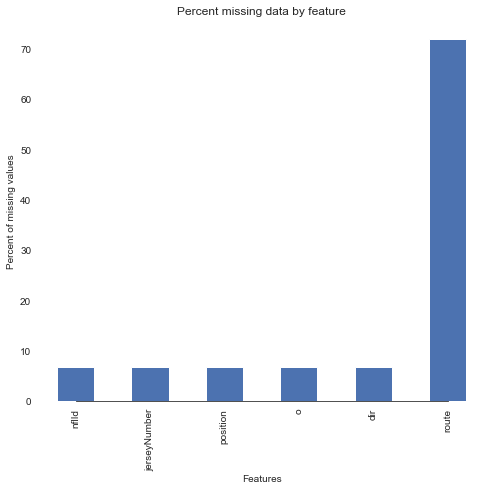

In [15]:
# Plot setup
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identifying missing values
missing = round(data.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)